<IPython.core.display.Javascript object>


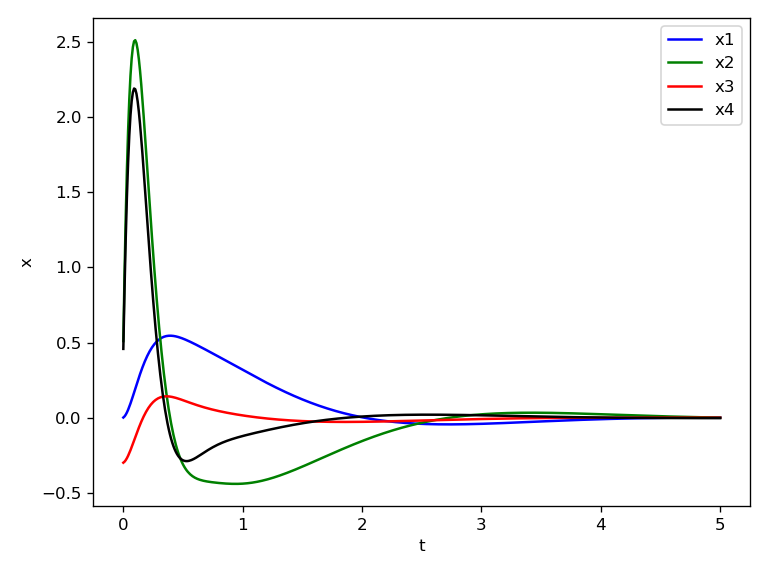

In [2]:
#%matplotlib notebook
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
#import math
#import time
import kal_python as kal


l_bar = 1.0  # length of bar
M = 1.0  # [kg]
m = 0.3  # [kg]
g = 9.8  # [m/s^2]

Q = np.diag([1, 0.01, 1.0, 0.01])
R = np.diag([0.01])
QQ = np.diag([1, 1, 1, 1,10])
RR = np.diag([0.01])
Qmpc = np.diag([20, 0.01, 100.0, 0.01])
T = 5#10  
dt = 0.01

ip = kal.inverted_pendulum_cart_model(M,m,l_bar)
ss = ip.get_ss_model()
dss = ip.get_dss_model(dt)

#controller = kal.no_controller(0)# no control no life
#controller = kal.LQR_controller(ss,Q,R)
#controller = kal.servo_controller(ss,QQ,R,dt)
controller = kal.mpc_controller(dss,Qmpc,R,100)


x0 = np.array([0,0,-0.3,0])

f = kal.inverted_pendulum_cart_function(M,m,l_bar,x0)
sim = kal.simulator(T,dt,controller,f,x0,False)

sim.simulation()
fig = kal.t_x_plot(4,int(T/dt))
fig.show(sim.t_log,sim.x_log)




<IPython.core.display.Javascript object>


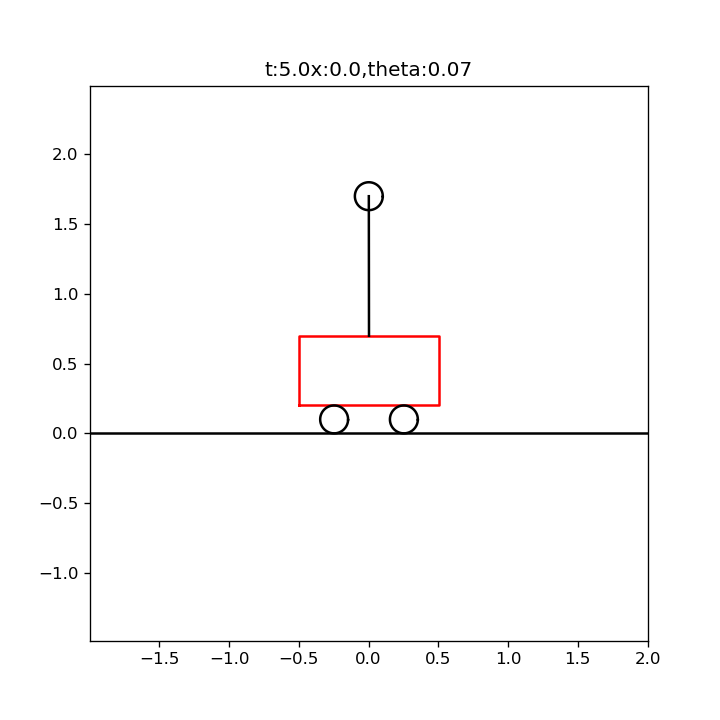

In [10]:
sim.draw()